# 1. Describing a single set of data
- VP of Fundraising in your company asks you for some sort of description of how many friends your members have that he can include in his elevator pitches.
- Easy to produce this data but how to describe it?
- An obvious desciption of a dataset is its data itself.

In [97]:
# Example

num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,
                11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,
                9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,
                6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,
                4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
                3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

Text(0, 0.5, '# of Friends')

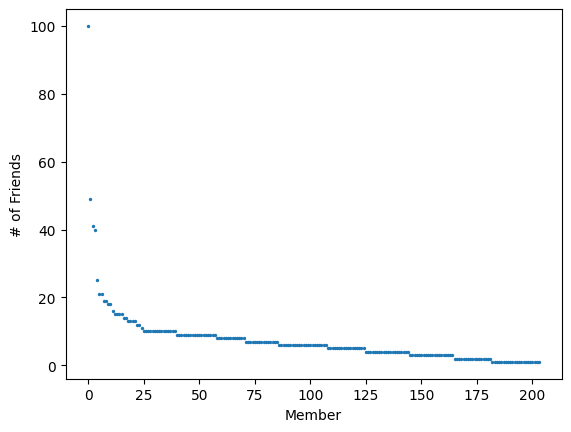

In [98]:
import matplotlib.pyplot as plt
xs = [index for index, friends in enumerate(num_friends)]
ys = num_friends
plt.scatter(xs, ys, marker='.', s= 8)

plt.xlabel('Member')
plt.ylabel('# of Friends')

- Small datasets are easily readable and can be analyzed directly.
- Large datasets are not easily readble thus we use statistics to summarize and interpret its data.
- Statistics helps to destill and communicate relevant features of our data.
- For example: Create a histogram of friend counts to visualize distribution and trends. 

<BarContainer object of 101 artists>

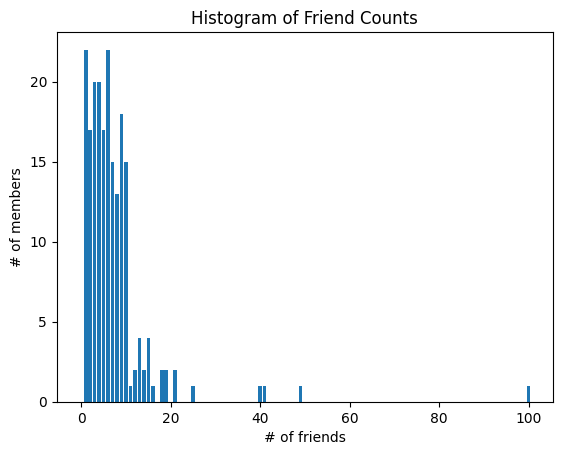

In [99]:
# Create histogram of friend counts

from collections import Counter
import matplotlib.pyplot as plt

# print(f"{num_friends=}")

friend_counts = Counter(num_friends)
# print(f"{friend_counts=}")

xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.xlabel("# of friends")
plt.ylabel("# of members")
plt.title("Histogram of Friend Counts")
plt.bar(xs,ys)

- To understand it deeply we need to generate some statistics.

In [100]:
# Number of data points
num_points = len(num_friends)
assert num_points == 204

In [101]:
# Largest and Smallest values

largest_value = max(num_friends)
smallest_value = min(num_friends)

assert largest_value == 100
assert smallest_value == 1

In [102]:
# To know values specific to positions

sorted_values = sorted(num_friends)  # By default it will sort in ascending order

smallest_value = sorted_values[0]
assert smallest_value == 1

largest_value = sorted_values[-1]
assert largest_value == 100

# 2. Central tendencies

- Usually, we will want some notion of <u>where our data is centered?</u>

- Central tendencies are summarized in this graph:
<img src="central_tendencies.png" alt="Central Tendencies" width="500">


### (a) Mean/Average
   > - Sum of data divided by its count  
   > - Represents the **central point of a data set**  
   > - **Affected by outliers** (extremely high or low values in the dataset) and can be skewed by them  
   > - Best used: <u>when the data is evenly distributed without outliers</u>  

In [103]:
from typing import List

# Mean
def mean(my_dataset: List[float]) -> float:
    """
    Mean of my_dataset
    """
    return sum(my_dataset) / len(my_dataset)

In [104]:
mean(num_friends)

7.333333333333333

### (b) Median

- **Middle value** of a dataset **when sorted** from smallest to larger
> - For even number dataset, median = avg of two middle values
> - For odd number dataset, median = middle value
- **Calculation**: Sort all values, then select the middle one (or average the two middle ones for an even number of values).
- **Resistant to Outliers** - The median is not affected by outliers or extremely skewed data.
- **Best Used**: When the data has outliers or is not symmetrically distributed.

In [105]:
# For odd length dataset
# The underscores are for "private" methods under median() method
def _median_odd(my_dataset: List[float]) -> float:
    #median is middle element
    return my_dataset[len(my_dataset)//2]   # '//' divides and discards fractional part (gives only integer)

# For even length dataset
def _median_even(my_dataset: List[float]) -> float:
    # Median is avg of two middle elements
    high_midpoint = len(my_dataset)//2
    low_midpoint = high_midpoint-1
    return (my_dataset[low_midpoint] + my_dataset[high_midpoint])/2

# Overall median function
def median(my_dataset: List[float]) -> float:
    v = sorted(my_dataset)
    return _median_even(v) if len(v)%2 == 0 else _median_odd(v)



In [106]:
assert 7.331 < mean(num_friends) < 7.334
assert median(num_friends) == 6

In [107]:
# Let's add a outlier 5000 and check mean and median
# Effect of outliers on mean is very high, whereas on median its very small

num_friends_with_outliers = num_friends + [5000,2000]
assert 41.2 < mean(num_friends_with_outliers) < 41.3   # Without outlier mean was 7.33
assert median(num_friends_with_outliers) == 6          # Without outlier median was same

#### Median as Quantile
- <u>Quantiles</u> are a generalization of the median, representing the **values below which a certain percentage of the data falls.**
  
- The median is a specific quantile where 50% of the data lies below and 50% lies above.
  
- **Median (50th Percentile)**: The value below which 50% of the data falls.
  
- **First Quartile (Q1 or 25th Percentile)**: The value below which 25% of the data falls.
  
- **Second Quartile (Q2 or 50th Percentile, which is the Median)**: The value below which 50% of the data falls.
  
- **Third Quartile (Q3 or 75th Percentile)**: The value below which 75% of the data falls.

- <u>Percentiles</u>: Generalizes the concept further. For example, the **90th percentile represents the value below which 90% of the data falls.**


In [108]:
len(num_friends)

204

In [109]:
# Define a quantile function

def quantile(my_dataset: List[float], my_quantile: float) -> float:
    """
    finds data value from my_dataset below which my_quantile% values lies
    """
    my_sorted = sorted(my_dataset)
    return my_sorted[int(len(my_dataset)*my_quantile)]    # Pay attention to 'int'

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.50) == 6
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

# Means 25% values of dataset lies below 3 (not including 3)

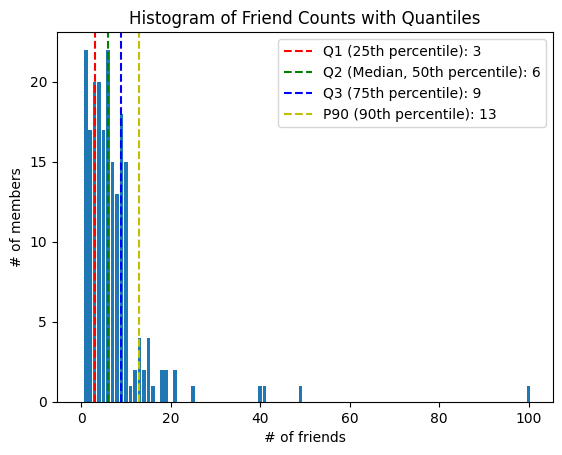

In [110]:
friend_counts = Counter(num_friends)

Q1 = quantile(num_friends, 0.25)
Q2 = quantile(num_friends, 0.5)
Q3 = quantile(num_friends, 0.75)
p90 = quantile(num_friends, 0.9)

xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs,ys)
plt.axvline(Q1, color='r', linestyle='--', label=f'Q1 (25th percentile): {Q1}')
plt.axvline(Q2, color='g', linestyle='--', label=f'Q2 (Median, 50th percentile): {Q2}')
plt.axvline(Q3, color='b', linestyle='--', label=f'Q3 (75th percentile): {Q3}')
plt.axvline(p90, color='y', linestyle='--', label=f'P90 (90th percentile): {p90}')
plt.legend()
plt.xlabel("# of friends")
plt.ylabel("# of members")
plt.title("Histogram of Friend Counts with Quantiles")
plt.show()



### (c) Mode
- **Most common values** in a dataset
- Used less frequently

In [111]:
from collections import Counter

def mode(my_dataset: List[float]) -> List[float]:
    """
    Returns list of most common values in my_dataset
    """
    count_dict = Counter(my_dataset) # Creates a dictionary of key:value = datapoint:counts
    max_counts = max(count_dict.values()) # Max repeating dict value
    return [x for x,y in count_dict.items() if y == max_counts] # Key coresponding to max repeating value

In [112]:
# Apply mode function to num_friends
print(f"counter = {Counter(num_friends).items()}")
assert mode(num_friends) == [6,1]

counter = dict_items([(100.0, 1), (49, 1), (41, 1), (40, 1), (25, 1), (21, 2), (19, 2), (18, 2), (16, 1), (15, 4), (14, 2), (13, 4), (12, 2), (11, 1), (10, 15), (9, 18), (8, 13), (7, 15), (6, 22), (5, 17), (4, 20), (3, 20), (2, 17), (1, 22)])


# 3. Dispersion
- How spreaded our values in a dataset are.
- Shows variability and volatility of data.
- Some common measures of dispersion are: Range, Variance, SD, IQR.

#### (a) Range
   - The difference between the highest and lowest values in the dataset:
     > $$Range(x) = x_{max} - x_{min}$$
   - It gives a **quick sense of the spread**
   - But it can be **heavily influenced by outliers**
   - Maximum undispered data means?
     > max = min   
     > i.e. List has only same values

In [113]:
def data_range(my_dataset: List[float]) -> float:
    return max(my_dataset) - min(my_dataset)

In [114]:
assert data_range(num_friends) == 99

#### (b) Variance
> $$Variance(\sigma^{2}) = \frac{\sum{(X-\bar{X})^{2}}}{n}$$
> - Average squared difference from mean.
> - (Variance) $\alpha$ (Spread).
> - It gives a measure of **how much each value in the data set varies from the mean.**
> - Influenced by outliers.

In [115]:
from scratch.linear_algebra import sum_of_squares

# Find deviation of x from its mean
def de_mean(my_dataset: List[float]) -> List[float]: 
    """
    Translate dataset by subtracting its mean (so the result has mean 0)
    """
    my_mean = mean(my_dataset)
    return [(x_i-my_mean) for x_i in my_dataset]

# Find variance
def variance(my_dataset: List[float]) -> float:
    """
    Almost the average squared deviation from the mean
    """
    assert len(my_dataset) >= 2 # Variance requires at least two elements
    return sum_of_squares(de_mean(my_dataset))/len(my_dataset)-1

# This looks like it is almost the average squared deviation from the mean, except that
# we’re dividing by n - 1 instead of n. In fact, when we’re dealing with a sample from a
# larger population, x_bar is only an estimate of the actual mean, which means that on
# average (x_i - x_bar) ** 2 is an underestimate of x_i’s squared deviation from the
# mean, which is why we divide by n - 1 instead of n. See Wikipedia.

In [116]:
assert 80.1 < variance(num_friends) < 80.2

#### (c) Standard Deviation
> $$\text{Standard Deviation} (\sigma) = \sqrt{variance(\sigma^{2})}$$
> - Square root of the variance.  
> - It is in the **same units as the data**, making it more interpretable than variance. 
> - **A low SD means the values tend to be close to the mean, while a high standard deviation indicates that the values are spread out over a wider range**.

In [117]:
import math

def standard_deviation(my_dataset: List[float]) -> float:
    """
    The standard deviation is the square root of the variance
    """
    return math.sqrt(variance(my_dataset))

In [118]:
# assert 9 < standard_deviation(num_friends) < 9.04
# assert 374 < standard_deviation(num_friends_with_outliers) < 375  # Outlier problem
standard_deviation(num_friends)

8.952306454186726

In [119]:
# import matplotlib.pyplot as plt

# # Compute mean and standard deviation
# mean_nf = mean(num_friends)
# std_dev = standard_deviation(num_friends)

# # Plot scatter plot
# xs = [index for index, friends in enumerate(num_friends)]
# ys = num_friends
# plt.scatter(ys, xs, marker='.', alpha=0.7, label='Data Points', s=8, color='g')

# # Plot mean and standard deviations
# plt.axvline(mean_nf, color='r', linestyle='--', label=f"Mean: {mean:.2f}")
# plt.axvline(mean_nf - std_dev, color='g', linestyle='--', label=f'-1 SD: {mean - std_dev:.2f}')
# plt.axvline(mean_nf + std_dev, color='b', linestyle='--', label=f'+1 SD: {mean + std_dev:.2f}')
# plt.xlim((-5,30))

# plt.xlabel('Member')
# plt.ylabel('# of Friends')
# plt.title('Scatter Plot of Number of Friends with Standard Deviations')
# plt.legend()
# plt.show()


In [120]:
# import matplotlib.pyplot as plt

# # Calculate variance and standard deviation
# mean_nf = mean(num_friends)
# variance = variance(num_friends)
# std_dev = math.sqrt(variance)

# plt.figure(figsize=(10, 6))
# plt.hist(num_friends, bins=100, edgecolor='k', alpha=0.7, label='Frequency')

# # Plot mean and standard deviation
# plt.axvline(mean_nf, color='r', linestyle='--', label=f'Mean: {mean_nf:.2f}')
# plt.axvline(mean_nf - std_dev, color='g', linestyle='--', label=f'-1 SD: {mean_nf - std_dev:.2f}')
# plt.axvline(mean_nf + std_dev, color='b', linestyle='--', label=f'+1 SD: {mean_nf + std_dev:.2f}')

# plt.title('Histogram of Number of Friends with Standard Deviation')
# plt.xlabel('Number of Friends')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()


#### (d) Interquartile Range (IQR)
$$ IQR = Q_3 - Q_1$$
> - Both range and SD are very vulnerable to outliers  
> - So we use values **between 25% and 75%** i.e. 1st and 3rd quantile to get less affected by outliers.  
> - It is the range within which the central 50% of the values fall.  
> - Calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1).


In [121]:
from typing import List
def interquatile_range(my_dataset: List[float]) -> float:
    """
    Returns the difference between the 75%-ile and the 25%-ile
    """
    return quantile(my_dataset,0.75)-quantile(my_dataset,0.25)

assert interquatile_range(num_friends) == 6
assert interquatile_range(num_friends_with_outliers) == 6  # Not much affected by small number of outliers

# 4. Covariance and Correlation

- Now, if we have given two datasets and we want to find how these two are related. We find:
  > 1. Their 'change' relationship - either both are increasing or decreasing or changing in opoosite direction. (Defined by Covariance)
  > 2. Their direction of change + strength of relationship. (Defined by Correlation)

## Covariance
> $$ \text{Covariance} = \frac{[x-\bar{x}]\cdot[y-\bar{y}]}{(n-1)}$$  
> - <u>Sign</u> of Covariance indicates the direction of the linear relationship:
>   1. Positive covariance indicates either both are increasing or both are decreasing.
>   2. Negative covariance indiactes both are in opposite direction.

> - Covariance near 0 indiactes two variables have no linear relationship (but cannot be said independent).

Let's find the covariance between number of friends and number of hours spent on website:

In [122]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,
                 38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,
                 26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,
                 46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,
                 46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,
                 36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,
                 19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,
                 31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,
                 44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,
                 43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,
                 25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,
                 29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,
                 38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,
                 27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,
                 35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,
                 33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,
                 23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm/60 for dm in daily_minutes]

In [123]:
from scratch.linear_algebra import dot

def covariance(x: List[float], y: List[float]) -> float:
    assert len(x) == len(y), "xs and ys must have same number of elements"
    return dot(de_mean(x), de_mean(y))/(len(x) - 1)

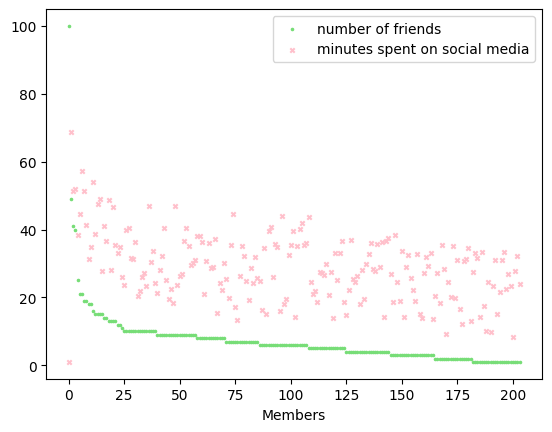

In [124]:
xs = [i for i in range(len(num_friends))]

plt.scatter(xs, num_friends, label = 'number of friends', marker='.', s=10, c='#77dd77')
plt.scatter(xs, daily_minutes, label = 'minutes spent on social media', marker='x', s=10, c='pink') 
# plt.scatter(xs, daily_hours, label = 'daily hours', marker='.')
plt.xlabel('Members')
# plt.ylabel('Counts')
plt.legend()

assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42/60 < covariance(num_friends, daily_hours) < 22.43/60  

**Limitations of covariance?**  

1. Covariance is not standardized, therefore its value is difficult to interpret directly without additional context.
   - For example, the covariance between variables measured in different units can be misleading.

2. If $x$ becomes $2x$, then covariance will also be doubled. Means it is dependent on scale.
   - Thus, covariance is often used in conjunction with correlation, which standardizes the covariance by dividing it by the product of the standard deviations of the two variables, making it easier to interpret.

## Correlation

- The **Pearson correlation coefficient ($r$)** between two variables $X$ and $Y$ can be calculated using the following formula:

$$
r = \frac{covariance(x,y)}{\sigma_{x} . \sigma_{y}} =\frac{{\sum{{(x_i - \bar{x})(y_i - \bar{y})}}}}{{\sqrt{{\sum{{(x_i - \bar{x})^2}} \sum{{(y_i - \bar{y})^2}}}}}}
$$

> - The nominator keeps the direction of relationship.
> - The denominator stadardizes the magnitude of nominator and liminng it within a range of -1 to 1.
> - Thus correlation becomes unitless.  
> - $-1$ will mean perfect anticorrelation and $1$ means perfect correlation.
> - $0.25$ means relatively weak positive correlation  

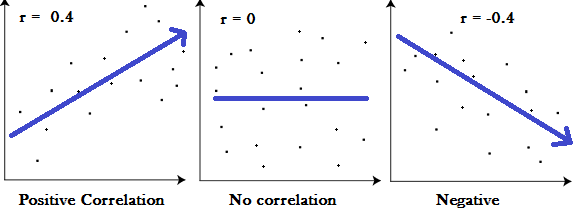

In [125]:
from typing import List
def correlation(x: List[float], y:List[float]):
    """
    Measures how much x and y vary in tandem about their means
    """
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y)/stdev_x/stdev_y
    else:
        return 0 # If no variation, correlation zero

In [129]:
correlation(num_friends, daily_minutes)

0.2513906588002356

In [126]:
assert 0.24 < correlation(num_friends, daily_minutes) < 0.252

- In num_friends, the 100th value is an outlier
- Sometimes if we remove outlier, the correlation becomes very strong. For example:

In [127]:
outlier = num_friends.index(100)    # index of outlier

# Remove outlier
num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

assert 0.58 < correlation(num_friends_good, daily_minutes_good) < 0.588

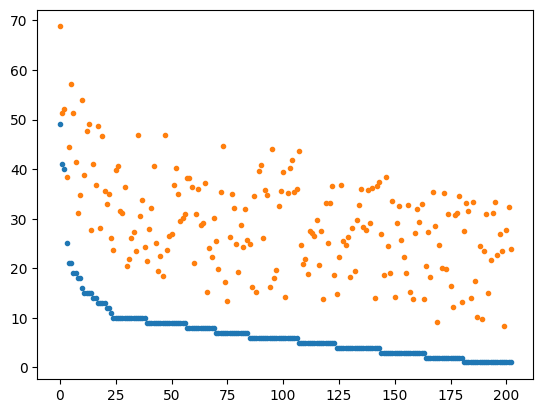

In [128]:
# plot and see how this is varying

xs = [i for i in range(len(num_friends_good))]

plt.scatter(xs,num_friends_good, marker='.')
plt.scatter(xs, daily_minutes_good, marker='.')


- the outlier is actually an internal test account that no one ever bothered to remove. So you feel justified in excluding it.

## Correlation caveats (problems)

### (a) Simpson's Paradox
- the composition of subgroups can significantly affect the interpretation of aggregated data, leading to seemingly paradoxical results.
  
- problem with correlation is that: in a data correlation measures relation between two variables considering all other factors equal

- If your dataclasses are assigned at random, as they might be in a well-designed experiment, “all else being equal” might not be a terrible assumption. But when there is a deeper pattern to class assignments, “all else being equal” can be an awful assumption.

- The only real way to avoid this is by knowing your data and by doing what you can to make sure you’ve checked for possible **confounding factors**. (Obviously, this is not always possible)

**Example: Ice Cream Sales and Drowning Cases**

Suppose we have data on two variables:

1. Ice Cream Sales: Number of ice creams sold per day.
2. Drowning Cases: Number of drowning incidents reported per day.

Observed Correlation
- You might observe a positive correlation between ice cream sales and drowning cases, meaning that as ice cream sales increase, drowning incidents also seem to increase.

- Misleading Interpretation
If we take this correlation at face value, we might mistakenly conclude that eating ice cream causes drowning, which is not true.

Confounding Factor: <u>Temperature</u>

- Deeper Pattern: The actual underlying factor here is temperature. Both ice cream sales and drowning incidents are higher on hot days.
  
- Confounding Factor: Temperature acts as a confounding factor, influencing both ice cream sales and drowning incidents.

When we consider the effect of temperature, the correlation between ice cream sales and drowning incidents can be better understood as both being influenced by hot weather, rather than one causing the other.

It's crucial to understand the context and possible confounding factors in your data.
Check Assumptions: Don't assume "all else being equal" unless you have controlled or accounted for other variables.
This example illustrates why it's essential to consider confounding factors and avoid relying solely on correlation for drawing conclusions.

### (b) Correlation shows 0, but there can be any other relationship between two variables!
- For example:
```python
x = [-2,-1,0,1,2]
```
```python
y = [2,1,0,1,2]
```

- Here, x and y have zero correlation. But they certainly have a relationship— each element of y equals the absolute value of the corresponding element of x.

### (c) Correlation tells nothing about how large the relationship is!

- Imagine we have two datasets:

Dataset 1:
```python
X: [1, 2, 3, 4, 5]
Y: [2, 4, 6, 8, 10]
```

Dataset 2:
```python
X: [1, 2, 3, 4, 5]
Y: [10, 20, 30, 40, 50]
```
- Both of these datasets will have a correlation of 1, indicating a perfect positive linear relationship. However, the scales of the relationships are very different. In the first dataset, for each unit increase in X, Y increases by 2 units. In the second dataset, for each unit increase in X, Y increases by 10 units.

- Even though both have a correlation of 1, the 'strength' or 'magnitude' of the relationship (i.e., how much Y changes with a unit change in X) is much larger in the second dataset. This shows that while correlation tells us about the direction and consistency of the relationship, **it does not tell us about the magnitude of change**.

- Therefore, when analyzing data, it's important to consider both the correlation and the actual values or scale of the data to fully understand the nature of the relationship between variables.

## Correlation and Causation
- "Correlation does not imply causation" is a fundamental principle in statistics and data analysis.
  
- This means that just because two variables are correlated (i.e., there is a statistical association between them), it does not necessarily mean that one variable causes the other.

- Correlation indicates a relationship, but it does not imply a cause-and-effect relationship.

- if x and y are strongly correlated, that might mean that x causes y, that y causes x, that each causes the other, that some third factor causes both, or nothing at all.

**Why Correlation Does Not Imply Causation:**

1. **Third Variable Problem**: There may be a third variable (**confounding variable**) influencing both variables, creating a spurious correlation.

2. **Reverse Causation**: The observed correlation might be due to the effect of the second variable on the first, rather than the other way around.

3. **Coincidence**: Correlation may be coincidental, and there may be no causal relationship between the variables.


To establish causation, additional evidence such as controlled experiments, randomized trials, or a solid theoretical framework is needed. While correlation is a valuable tool in identifying associations, it should not be used alone to infer causation.
